## Football Match Result Prediction - Using Neural Network 2
### Using feature selection and Tuning the NN Models - To achieve optimal results
<p>
<strong>
@author Avinash Rai <br/>
@lastmodified 10/03/2021
</strong>
</p>

In [1]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn import metrics
from utilities import getTrainTestDataset, cat_3_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
X_train_epl, X_test_epl, y_train_epl, y_test_epl = getTrainTestDataset("pickles\dataset-epl.pickle")
X_train_spl, X_test_spl, y_train_spl, y_test_spl = getTrainTestDataset("pickles\dataset-spl.pickle")
print(X_train_epl.shape)
print(X_train_spl.shape)
print(X_test_epl.shape)
print(X_test_spl.shape)

(1772, 29)
(1775, 29)
(874, 29)
(875, 29)


In [3]:
X_train_epl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
1526,-0.867168,-0.149891,-0.368570,-0.491395,-1.030352,-0.160132,-0.539587,0.291926,-0.945089,-1.174424,...,3,0,0,0,0,1,0,0,0,14
157,0.588288,2.467009,1.524303,1.000785,0.743320,2.278740,-0.783542,1.573927,-1.650598,-1.584578,...,3,0,0,0,0,0,0,0,0,7
1574,0.467000,2.162718,0.375059,1.272091,1.393667,1.921832,0.131290,1.024498,-0.560267,-0.969348,...,3,0,0,0,0,0,0,0,0,4
1850,-1.412963,-1.184480,-1.450211,-1.508791,-1.148597,-1.111887,-0.112666,0.169831,-0.047170,0.056036,...,1,0,0,0,0,0,0,0,0,6
38,-0.260728,0.397832,0.645469,-0.423569,-0.498251,0.553684,-0.844531,0.780307,-1.137501,-0.149041,...,0,0,0,0,0,0,0,0,0,15


In [4]:
X_train_spl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
2020,-1.153904,-1.099911,-1.389243,-1.243118,-0.980697,-0.935257,0.067027,-0.012995,-0.048462,-0.132584,...,1,0,0,0,0,0,0,0,0,2
1143,0.694261,0.728530,1.434441,1.436632,0.923569,0.907177,-0.559609,-0.521091,0.016695,-1.185784,...,1,0,0,1,0,0,0,0,0,1
230,-0.865129,-0.528523,-0.798239,-0.262722,-0.861680,-0.578657,-0.160840,-0.295271,-0.309092,0.288696,...,0,0,0,0,0,0,0,0,0,4
1236,-0.114312,-0.299968,-1.257908,-0.720240,0.507011,-0.281490,0.978498,0.325735,0.863741,1.131256,...,3,0,0,0,0,0,0,0,0,-7
157,-0.980639,-0.757078,-0.404237,-0.197362,-1.040205,-1.113557,-0.616575,-0.577546,0.081852,0.288696,...,3,0,0,0,0,0,0,0,0,-2


## 1) Using Extra Tree Classifier for Feature Selection

### 1.1. EPL Dataset

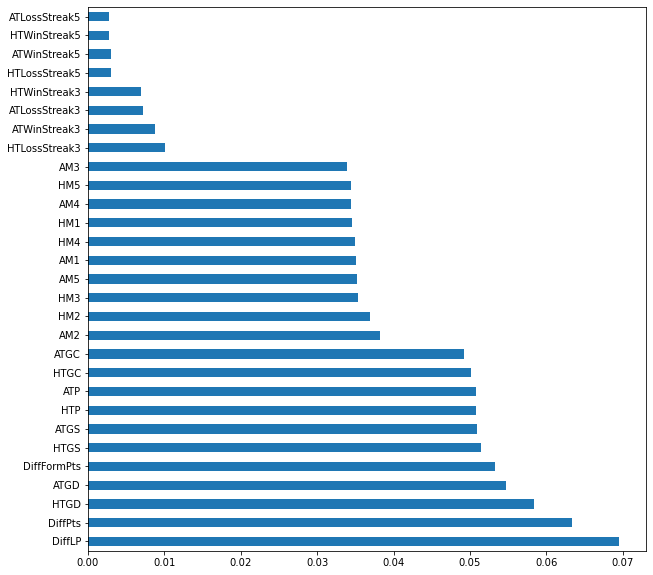

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np

model = ExtraTreesClassifier()
model.fit(X_train_epl,y_train_epl.values.ravel())
# print(model.feature_importances_)

feat_importances = pd.Series( model.feature_importances_, index=X_train_epl.columns )
feat_importances.nlargest(29).plot( kind='barh', figsize=(10,10) )

Selecting the <b>11</b> most important features to be used for training. The rest of the features wiil be discraded.

In [6]:
X_train_epl = X_train_epl[["DiffLP","DiffPts","HTGD", "DiffFormPts","ATGD","HTGS","ATGS","HTP", "ATP"
                   ,"HTGC","ATGC" ]]
X_test_epl = X_test_epl[["DiffLP","DiffPts","HTGD", "DiffFormPts","ATGD","HTGS","ATGS","HTP", "ATP"
                   ,"HTGC","ATGC" ]]

X_train_epl.head()

,DiffLP,DiffPts,HTGD,DiffFormPts,ATGD,HTGS,ATGS,HTP,ATP,HTGC,ATGC
1526,14,-0.945089,-0.539587,-1.174424,0.291926,-0.867168,-0.149891,-1.030352,-0.160132,-0.368570,-0.491395
157,7,-1.650598,-0.783542,-1.584578,1.573927,0.588288,2.467009,0.743320,2.278740,1.524303,1.000785
1574,4,-0.560267,0.131290,-0.969348,1.024498,0.467000,2.162718,1.393667,1.921832,0.375059,1.272091
1850,6,-0.047170,-0.112666,0.056036,0.169831,-1.412963,-1.184480,-1.148597,-1.111887,-1.450211,-1.508791
38,15,-1.137501,-0.844531,-0.149041,0.780307,-0.260728,0.397832,-0.498251,0.553684,0.645469,-0.423569


### 1.2. SPL Dataset

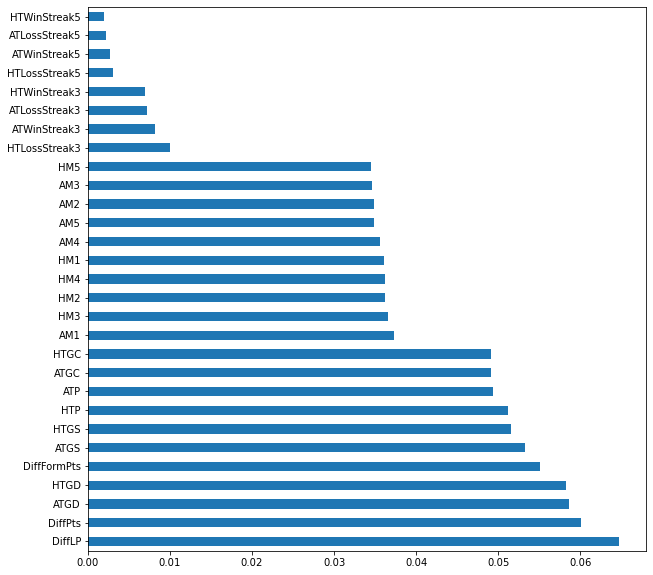

In [7]:
model2 = ExtraTreesClassifier()
model2.fit(X_train_spl,y_train_spl.values.ravel())
# print(model2.feature_importances_)

feat_importances = pd.Series( model2.feature_importances_, index=X_train_spl.columns )
feat_importances.nlargest(50).plot( kind='barh', figsize=(10,10) )

Same as EPL dataset, Selecting the <b>11</b> most important features to be used for training. The rest of the features wiil be discraded.

In [8]:
X_train_spl = X_train_spl[["DiffLP","DiffPts","HTGD", "DiffFormPts","ATGD","HTGS","ATGS","HTP", "ATP"
                   ,"HTGC","ATGC" ]]
X_test_spl = X_test_spl[["DiffLP","DiffPts","HTGD", "DiffFormPts","ATGD","HTGS","ATGS","HTP", "ATP"
                   ,"HTGC","ATGC" ]]

X_train_epl.head()

,DiffLP,DiffPts,HTGD,DiffFormPts,ATGD,HTGS,ATGS,HTP,ATP,HTGC,ATGC
1526,14,-0.945089,-0.539587,-1.174424,0.291926,-0.867168,-0.149891,-1.030352,-0.160132,-0.368570,-0.491395
157,7,-1.650598,-0.783542,-1.584578,1.573927,0.588288,2.467009,0.743320,2.278740,1.524303,1.000785
1574,4,-0.560267,0.131290,-0.969348,1.024498,0.467000,2.162718,1.393667,1.921832,0.375059,1.272091
1850,6,-0.047170,-0.112666,0.056036,0.169831,-1.412963,-1.184480,-1.148597,-1.111887,-1.450211,-1.508791
38,15,-1.137501,-0.844531,-0.149041,0.780307,-0.260728,0.397832,-0.498251,0.553684,0.645469,-0.423569


## 2. Training using previous NN Configurations

In [10]:
def buildNN( name, input_data, learning_rate, layers, dropout_rate ):
    
    input_shape = ( input_data.shape[1], )
    
    nn_model = Sequential( name=name )
    nn_model.add( Input(shape=input_shape ))
    # nn_model.add(Flatten())
    
    for layer in layers:
        nn_model.add( Dense(layer, activation = 'relu', kernel_initializer="he_normal") )
    nn_model.add( Dropout(dropout_rate) )

    # Output    
    nn_model.add( Dense(3 , activation='softmax') )
    nn_model.compile( optimizer=Adam(learning_rate=learning_rate), 
        loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
    nn_model.summary()
    
    return nn_model

### 2.1. EPL

In [11]:
# EPL[1e-05, ‘41–75–3’, 0.5, 16, 2.8191776275634766, 0.6168224215507507]
epl_best_model = buildNN( "epl_roland-shun-41-75-3_11_features", X_train_epl, 0.00001, [41,75], 0.5 )

Model: "epl_roland-shun-41-75-3_11_features"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 41)                492       
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 228       
Total params: 3,870
Trainable params: 3,870
Non-trainable params: 0
_________________________________________________________________


In [12]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
training = epl_best_model.fit( 
    X_train_epl, 
    y_train_epl, 
    batch_size = 16, 
    epochs = 500,
    validation_data = (X_test_epl,y_test_epl),
    callbacks = [ earlyStopping ]
)

Train on 1772 samples, validate on 874 samples
Epoch 1/500
1772/1772 [==============================] - 1s 313us/sample - loss: 3.1832 - accuracy: 0.3059 - val_loss: 2.0755 - val_accuracy: 0.2746
Epoch 2/500
1772/1772 [==============================] - 0s 77us/sample - loss: 3.1384 - accuracy: 0.3064 - val_loss: 1.9576 - val_accuracy: 0.2838
Epoch 3/500
1772/1772 [==============================] - 0s 77us/sample - loss: 2.8322 - accuracy: 0.3392 - val_loss: 1.8661 - val_accuracy: 0.3021
Epoch 4/500
1772/1772 [==============================] - 0s 77us/sample - loss: 3.0530 - accuracy: 0.3290 - val_loss: 1.7807 - val_accuracy: 0.3078
Epoch 5/500
1772/1772 [==============================] - 0s 78us/sample - loss: 2.9026 - accuracy: 0.3352 - val_loss: 1.7109 - val_accuracy: 0.3124
Epoch 6/500
1772/1772 [==============================] - 0s 83us/sample - loss: 2.7854 - accuracy: 0.3172 - val_loss: 1.6470 - val_accuracy: 0.3249
Epoch 7/500
1772/1772 [==============================] - 0s 77us

Epoch 56/500
1772/1772 [==============================] - 0s 84us/sample - loss: 1.7982 - accuracy: 0.4204 - val_loss: 1.1733 - val_accuracy: 0.5092
Epoch 57/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.7502 - accuracy: 0.4153 - val_loss: 1.1707 - val_accuracy: 0.5114
Epoch 58/500
1772/1772 [==============================] - 0s 81us/sample - loss: 1.7463 - accuracy: 0.4289 - val_loss: 1.1685 - val_accuracy: 0.5137
Epoch 59/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.6680 - accuracy: 0.4374 - val_loss: 1.1676 - val_accuracy: 0.5160
Epoch 60/500
1772/1772 [==============================] - 0s 81us/sample - loss: 1.7249 - accuracy: 0.4526 - val_loss: 1.1627 - val_accuracy: 0.5149
Epoch 61/500
1772/1772 [==============================] - 0s 84us/sample - loss: 1.7582 - accuracy: 0.4306 - val_loss: 1.1595 - val_accuracy: 0.5160
Epoch 62/500
1772/1772 [==============================] - 0s 75us/sample - loss: 1.7322 - accuracy: 0.4204

Epoch 111/500
1772/1772 [==============================] - 0s 93us/sample - loss: 1.3911 - accuracy: 0.4407 - val_loss: 1.0564 - val_accuracy: 0.5080
Epoch 112/500
1772/1772 [==============================] - 0s 93us/sample - loss: 1.3186 - accuracy: 0.4543 - val_loss: 1.0552 - val_accuracy: 0.5080
Epoch 113/500
1772/1772 [==============================] - 0s 96us/sample - loss: 1.2937 - accuracy: 0.4678 - val_loss: 1.0536 - val_accuracy: 0.5069
Epoch 114/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.3613 - accuracy: 0.4537 - val_loss: 1.0509 - val_accuracy: 0.5069
Epoch 115/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.3836 - accuracy: 0.4374 - val_loss: 1.0509 - val_accuracy: 0.5080
Epoch 116/500
1772/1772 [==============================] - 0s 81us/sample - loss: 1.3279 - accuracy: 0.4453 - val_loss: 1.0501 - val_accuracy: 0.5103
Epoch 117/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.3649 - accuracy:

1772/1772 [==============================] - 0s 81us/sample - loss: 1.1736 - accuracy: 0.4819 - val_loss: 1.0225 - val_accuracy: 0.5057
Epoch 166/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.1537 - accuracy: 0.4746 - val_loss: 1.0224 - val_accuracy: 0.5034
Epoch 167/500
1772/1772 [==============================] - 0s 80us/sample - loss: 1.1622 - accuracy: 0.4814 - val_loss: 1.0219 - val_accuracy: 0.5046
Epoch 168/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.1907 - accuracy: 0.4560 - val_loss: 1.0211 - val_accuracy: 0.5057
Epoch 169/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.1680 - accuracy: 0.4763 - val_loss: 1.0204 - val_accuracy: 0.5046
Epoch 170/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.1800 - accuracy: 0.4571 - val_loss: 1.0206 - val_accuracy: 0.5057
Epoch 171/500
1772/1772 [==============================] - 0s 81us/sample - loss: 1.1488 - accuracy: 0.4752 - val_

Epoch 220/500
1772/1772 [==============================] - 0s 96us/sample - loss: 1.0764 - accuracy: 0.4983 - val_loss: 1.0110 - val_accuracy: 0.5103
Epoch 221/500
1772/1772 [==============================] - 0s 87us/sample - loss: 1.0757 - accuracy: 0.4859 - val_loss: 1.0109 - val_accuracy: 0.5092
Epoch 222/500
1772/1772 [==============================] - 0s 95us/sample - loss: 1.0821 - accuracy: 0.4684 - val_loss: 1.0109 - val_accuracy: 0.5103
Epoch 223/500
1772/1772 [==============================] - 0s 137us/sample - loss: 1.0685 - accuracy: 0.4904 - val_loss: 1.0106 - val_accuracy: 0.5103
Epoch 224/500
1772/1772 [==============================] - 0s 131us/sample - loss: 1.0867 - accuracy: 0.4910 - val_loss: 1.0102 - val_accuracy: 0.5103
Epoch 225/500
1772/1772 [==============================] - 0s 98us/sample - loss: 1.0652 - accuracy: 0.5056 - val_loss: 1.0100 - val_accuracy: 0.5103
Epoch 226/500
1772/1772 [==============================] - 0s 76us/sample - loss: 1.0615 - accurac

1772/1772 [==============================] - 0s 78us/sample - loss: 1.0364 - accuracy: 0.5056 - val_loss: 1.0047 - val_accuracy: 0.5080
Epoch 275/500
1772/1772 [==============================] - 0s 82us/sample - loss: 1.0421 - accuracy: 0.5006 - val_loss: 1.0046 - val_accuracy: 0.5092
Epoch 276/500
1772/1772 [==============================] - 0s 81us/sample - loss: 1.0211 - accuracy: 0.5175 - val_loss: 1.0044 - val_accuracy: 0.5080
Epoch 277/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.0380 - accuracy: 0.4915 - val_loss: 1.0043 - val_accuracy: 0.5092
Epoch 278/500
1772/1772 [==============================] - 0s 78us/sample - loss: 1.0463 - accuracy: 0.4836 - val_loss: 1.0042 - val_accuracy: 0.5092
Epoch 279/500
1772/1772 [==============================] - 0s 79us/sample - loss: 1.0334 - accuracy: 0.4977 - val_loss: 1.0043 - val_accuracy: 0.5080
Epoch 280/500
1772/1772 [==============================] - 0s 83us/sample - loss: 1.0369 - accuracy: 0.4983 - val_

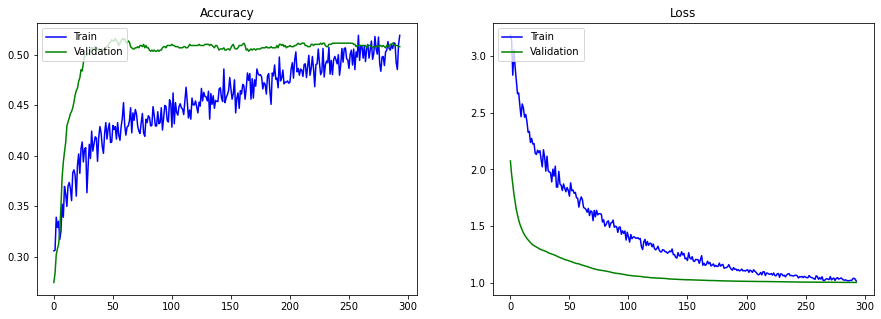

In [13]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(training.history['accuracy'], label='Train', color="blue")
plt.plot(training.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(training.history['loss'], label='Train', color="blue")
plt.plot(training.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

In [14]:
# Save model
save_path = "saved_models\\" + epl_best_model.name + ".h5"
epl_best_model.save( save_path )

### 2.2. La Liga

In [15]:
# La Liga[1e-05, ‘41–10–10–10–3’, 0, 32, 0.9817492961883545, 0.5420560836791992]
spl_best_model = buildNN( "spl_roland-shun-41-10-10-10_11_features", X_train_spl, 0.00001, [41,10,10,10], 0 )

Model: "spl_roland-shun-41-10-10-10_11_features"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 41)                492       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 33        
Total params: 1,165
Trainable params: 1,165
Non-trainable params: 0
_________________________

In [16]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
spl_training = spl_best_model.fit( 
    X_train_spl, 
    y_train_spl,
    batch_size = 32,
    epochs = 500,
    validation_data = (X_test_spl, y_test_spl),
    callbacks = [ earlyStopping ]
)

Train on 1775 samples, validate on 875 samples
Epoch 1/500
1775/1775 [==============================] - 0s 233us/sample - loss: 1.8774 - accuracy: 0.4485 - val_loss: 1.7888 - val_accuracy: 0.4286
Epoch 2/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.8477 - accuracy: 0.4473 - val_loss: 1.7622 - val_accuracy: 0.4286
Epoch 3/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.8193 - accuracy: 0.4479 - val_loss: 1.7357 - val_accuracy: 0.4297
Epoch 4/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.7910 - accuracy: 0.4468 - val_loss: 1.7106 - val_accuracy: 0.4286
Epoch 5/500
1775/1775 [==============================] - 0s 45us/sample - loss: 1.7633 - accuracy: 0.4468 - val_loss: 1.6857 - val_accuracy: 0.4286
Epoch 6/500
1775/1775 [==============================] - 0s 43us/sample - loss: 1.7361 - accuracy: 0.4456 - val_loss: 1.6605 - val_accuracy: 0.4297
Epoch 7/500
1775/1775 [==============================] - 0s 41us

Epoch 56/500
1775/1775 [==============================] - 0s 43us/sample - loss: 1.0649 - accuracy: 0.4569 - val_loss: 1.0746 - val_accuracy: 0.4286
Epoch 57/500
1775/1775 [==============================] - 0s 45us/sample - loss: 1.0627 - accuracy: 0.4580 - val_loss: 1.0728 - val_accuracy: 0.4274
Epoch 58/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0607 - accuracy: 0.4603 - val_loss: 1.0711 - val_accuracy: 0.4251
Epoch 59/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0588 - accuracy: 0.4603 - val_loss: 1.0694 - val_accuracy: 0.4274
Epoch 60/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0569 - accuracy: 0.4592 - val_loss: 1.0680 - val_accuracy: 0.4263
Epoch 61/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0552 - accuracy: 0.4586 - val_loss: 1.0666 - val_accuracy: 0.4251
Epoch 62/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0535 - accuracy: 0.4569

1775/1775 [==============================] - 0s 42us/sample - loss: 1.0207 - accuracy: 0.4721 - val_loss: 1.0421 - val_accuracy: 0.4309
Epoch 111/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0202 - accuracy: 0.4727 - val_loss: 1.0419 - val_accuracy: 0.4320
Epoch 112/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0199 - accuracy: 0.4721 - val_loss: 1.0416 - val_accuracy: 0.4320
Epoch 113/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0196 - accuracy: 0.4721 - val_loss: 1.0414 - val_accuracy: 0.4331
Epoch 114/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0192 - accuracy: 0.4704 - val_loss: 1.0411 - val_accuracy: 0.4343
Epoch 115/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0189 - accuracy: 0.4727 - val_loss: 1.0409 - val_accuracy: 0.4366
Epoch 116/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0185 - accuracy: 0.4721 - val_

1775/1775 [==============================] - 0s 41us/sample - loss: 1.0073 - accuracy: 0.4980 - val_loss: 1.0305 - val_accuracy: 0.4606
Epoch 165/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0071 - accuracy: 0.4992 - val_loss: 1.0303 - val_accuracy: 0.4617
Epoch 166/500
1775/1775 [==============================] - 0s 40us/sample - loss: 1.0069 - accuracy: 0.5008 - val_loss: 1.0302 - val_accuracy: 0.4617
Epoch 167/500
1775/1775 [==============================] - 0s 42us/sample - loss: 1.0068 - accuracy: 0.5008 - val_loss: 1.0300 - val_accuracy: 0.4617
Epoch 168/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0066 - accuracy: 0.5020 - val_loss: 1.0298 - val_accuracy: 0.4617
Epoch 169/500
1775/1775 [==============================] - 0s 41us/sample - loss: 1.0064 - accuracy: 0.5025 - val_loss: 1.0297 - val_accuracy: 0.4617
Epoch 170/500
1775/1775 [==============================] - 0s 43us/sample - loss: 1.0062 - accuracy: 0.5025 - val_

Epoch 219/500
1775/1775 [==============================] - 0s 46us/sample - loss: 0.9992 - accuracy: 0.5155 - val_loss: 1.0217 - val_accuracy: 0.4823
Epoch 220/500
1775/1775 [==============================] - 0s 48us/sample - loss: 0.9991 - accuracy: 0.5155 - val_loss: 1.0216 - val_accuracy: 0.4846
Epoch 221/500
1775/1775 [==============================] - 0s 47us/sample - loss: 0.9990 - accuracy: 0.5161 - val_loss: 1.0215 - val_accuracy: 0.4846
Epoch 222/500
1775/1775 [==============================] - 0s 47us/sample - loss: 0.9988 - accuracy: 0.5161 - val_loss: 1.0214 - val_accuracy: 0.4857
Epoch 223/500
1775/1775 [==============================] - 0s 47us/sample - loss: 0.9988 - accuracy: 0.5161 - val_loss: 1.0212 - val_accuracy: 0.4857
Epoch 224/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9986 - accuracy: 0.5161 - val_loss: 1.0211 - val_accuracy: 0.4869
Epoch 225/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9985 - accuracy:

1775/1775 [==============================] - 0s 41us/sample - loss: 0.9932 - accuracy: 0.5166 - val_loss: 1.0153 - val_accuracy: 0.4903
Epoch 274/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9930 - accuracy: 0.5166 - val_loss: 1.0152 - val_accuracy: 0.4903
Epoch 275/500
1775/1775 [==============================] - 0s 45us/sample - loss: 0.9930 - accuracy: 0.5161 - val_loss: 1.0151 - val_accuracy: 0.4914
Epoch 276/500
1775/1775 [==============================] - 0s 47us/sample - loss: 0.9929 - accuracy: 0.5161 - val_loss: 1.0150 - val_accuracy: 0.4914
Epoch 277/500
1775/1775 [==============================] - 0s 46us/sample - loss: 0.9928 - accuracy: 0.5161 - val_loss: 1.0148 - val_accuracy: 0.4914
Epoch 278/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9927 - accuracy: 0.5172 - val_loss: 1.0147 - val_accuracy: 0.4880
Epoch 279/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9926 - accuracy: 0.5177 - val_

Epoch 328/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9878 - accuracy: 0.5211 - val_loss: 1.0086 - val_accuracy: 0.5006
Epoch 329/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9877 - accuracy: 0.5211 - val_loss: 1.0085 - val_accuracy: 0.5006
Epoch 330/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9876 - accuracy: 0.5217 - val_loss: 1.0084 - val_accuracy: 0.5006
Epoch 331/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9875 - accuracy: 0.5228 - val_loss: 1.0083 - val_accuracy: 0.5006
Epoch 332/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9874 - accuracy: 0.5217 - val_loss: 1.0082 - val_accuracy: 0.4994
Epoch 333/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9873 - accuracy: 0.5234 - val_loss: 1.0081 - val_accuracy: 0.4994
Epoch 334/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9872 - accuracy:

1775/1775 [==============================] - 0s 47us/sample - loss: 0.9830 - accuracy: 0.5223 - val_loss: 1.0036 - val_accuracy: 0.5086
Epoch 383/500
1775/1775 [==============================] - 0s 46us/sample - loss: 0.9830 - accuracy: 0.5217 - val_loss: 1.0035 - val_accuracy: 0.5086
Epoch 384/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9829 - accuracy: 0.5217 - val_loss: 1.0035 - val_accuracy: 0.5086
Epoch 385/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9828 - accuracy: 0.5228 - val_loss: 1.0034 - val_accuracy: 0.5086
Epoch 386/500
1775/1775 [==============================] - 0s 46us/sample - loss: 0.9828 - accuracy: 0.5223 - val_loss: 1.0033 - val_accuracy: 0.5097
Epoch 387/500
1775/1775 [==============================] - 0s 45us/sample - loss: 0.9827 - accuracy: 0.5228 - val_loss: 1.0033 - val_accuracy: 0.5097
Epoch 388/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9826 - accuracy: 0.5228 - val_

Epoch 437/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9793 - accuracy: 0.5228 - val_loss: 1.0004 - val_accuracy: 0.5074
Epoch 438/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9792 - accuracy: 0.5234 - val_loss: 1.0003 - val_accuracy: 0.5074
Epoch 439/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9792 - accuracy: 0.5234 - val_loss: 1.0003 - val_accuracy: 0.5074
Epoch 440/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9791 - accuracy: 0.5234 - val_loss: 1.0003 - val_accuracy: 0.5063
Epoch 441/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9791 - accuracy: 0.5234 - val_loss: 1.0002 - val_accuracy: 0.5063
Epoch 442/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9790 - accuracy: 0.5234 - val_loss: 1.0002 - val_accuracy: 0.5063
Epoch 443/500
1775/1775 [==============================] - 0s 48us/sample - loss: 0.9790 - accuracy:

1775/1775 [==============================] - 0s 44us/sample - loss: 0.9766 - accuracy: 0.5256 - val_loss: 0.9988 - val_accuracy: 0.5086
Epoch 492/500
1775/1775 [==============================] - 0s 42us/sample - loss: 0.9766 - accuracy: 0.5256 - val_loss: 0.9988 - val_accuracy: 0.5074
Epoch 493/500
1775/1775 [==============================] - 0s 44us/sample - loss: 0.9765 - accuracy: 0.5251 - val_loss: 0.9988 - val_accuracy: 0.5074
Epoch 494/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9765 - accuracy: 0.5251 - val_loss: 0.9987 - val_accuracy: 0.5074
Epoch 495/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9764 - accuracy: 0.5256 - val_loss: 0.9987 - val_accuracy: 0.5074
Epoch 496/500
1775/1775 [==============================] - 0s 41us/sample - loss: 0.9764 - accuracy: 0.5251 - val_loss: 0.9987 - val_accuracy: 0.5074
Epoch 497/500
1775/1775 [==============================] - 0s 43us/sample - loss: 0.9764 - accuracy: 0.5256 - val_

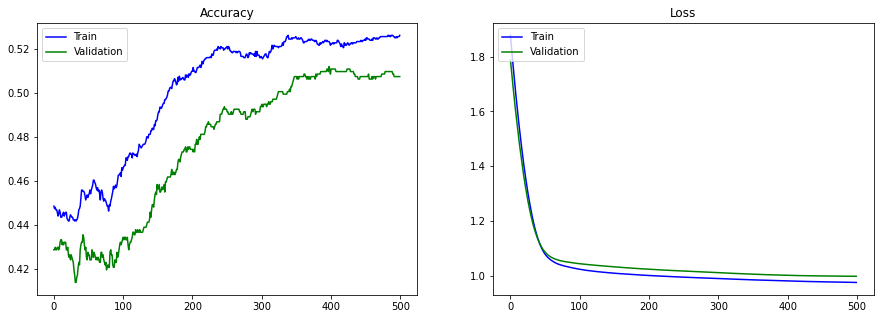

In [17]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(spl_training.history['accuracy'], label='Train', color="blue")
plt.plot(spl_training.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(spl_training.history['loss'], label='Train', color="blue")
plt.plot(spl_training.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

In [18]:
# Save model
save_path = "saved_models\\" + spl_best_model.name + ".h5"
spl_best_model.save( save_path )